#### Block 2:
#### Assignment 1 : 

David Müller, Léa Lombard, Elisa Lemaire 

#### 1.
The basic three assumptions of Langmuir are as following:
   1. the mono-layer coverage : each site can hold maximum one molecule 
   2. the equality of energy : all adsorption sites are identical and have the same energy of adsorption
   3. no interaction between adsorbed molecules : the adsorption of one molecule does not affect the adsorption of an other on an adjacent site 

#### 2.a.

Since one has the following expression for the gas uptake:

$$q = {q_{sat}k(T)P \over 1 + k(T)P} $$

Thus, at high pressure, one has :

$$ \lim_{P \to \infty}q = {q_{sat}k(T)P \over 1 + k(T)P} = q_{sat}$$

Since the dominator and the denominator tends towards infinity, one can use Bernoulli-L'Hopital theorem which leads to an expression in which one can cancel out the k(T) term leading to $q_{sat}$. 

#### 2.b. 
At low pressure, 1 + k(T)P -> 1 

Therefore, one has: $$q≈q_{sat}k(T)P$$ 

Which is a linear function of pressure.

#### 3. 
The previous linear equation corresponds to Henry’s Law. By identification, the henry coefficient H(T) is the linear coefficient: $H(T) = q_{sat}k(T)$, thus the henry’s coefficient temperature dependence is related to the Van’t Hoff equation: 
$$H(T) = q_{sat}*𝑘_0*exp^{−∆𝐻 \over 𝑅𝑇}$$
From this equation we can see that the Henry’s coefficient decreases exponentially with increasing temperature when ΔH<0 (exothermic).

#### 4.
A researcher used computational techniques to determine the CO₂ adsorption isotherms at three temperatures (263, 303, and 343 K). Her goal was to identify the Langmuir model parameters ($q_{\text{sat}}$, $k_0$, and $\Delta H$) describing CO₂ adsorption on a metal-organic framework (MOF). To obtain these parameters, she proceeded in two steps: 

##### Step 1: Fitting the Isotherms to the Langmuir Model

At 263 K, the adsorption data were fitted to the Langmuir equation to calculate both $q_{\text{sat}}$ and $k(263)$. Since $q_{\text{sat}}$ does not depend on temperature, it was kept constant for the other temperatures. Then, using the fixed $q_{\text{sat}}$, she adjusted the isotherms at 303 K and 343 K to find $k(303)$ and $k(343)$.

The Langmuir model is expressed as:

$$
q(P) = \frac{q_{\text{sat}} \cdot k(T) \cdot P}{1 + k(T) \cdot P}
$$

##### Step 2: Applying the Van’t Hoff Equation

Using the three values of $k(T)$ obtained, she plotted $\ln(k)$ versus $1/T$: 
$$ ln(k(T)) = {−∆𝐻 \over 𝑅}*{1 \over T} + ln(k_0) $$
The resulting linear plot allowed her to determine:

- $\Delta H$ from the slope:  
  $$
  \text{slope} = -\frac{\Delta H}{R}
  $$
  
- $k_0$ from the intercept:  
  $$
  \ln(k_0) = \text{intercept}
  $$

#### 5.

In [29]:
# Import needed modules 
# numpy will be used to convert lists to arrays and to use log, exp and fitting functions
import numpy as np 
# matplotlib will be used for plotting
import matplotlib.pyplot as plt

#### After the researcher did the fitting, she obtained the following values:
    qsat = 4.72 mmol/g
    k(263) = 6.75e-06 1/Pa
    k(303) = 1.48e-06 1/Pa
    k(343) = 5.16e-07 1/Pa

#### 5.a. Use the Van't Hoff equation to obtain k0 and delta H

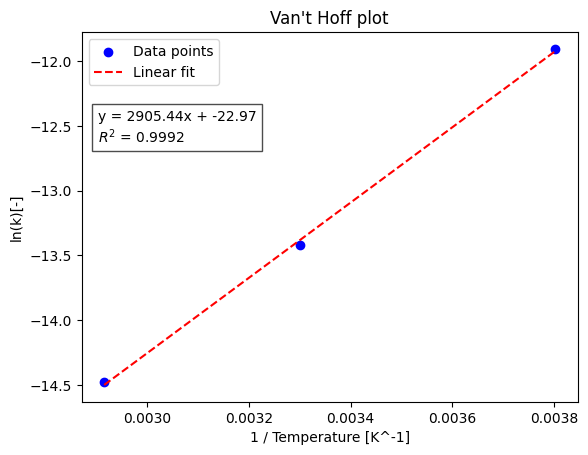

ΔH (adsorption enthalpy) = -24155.85 J/mol
k0 (pre-exponential factor) = 1.056e-10 1/Pa


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Constants
R = 8.314  # Gas constant in J/(mol·K)

# Linear function for fitting
def linear_func(x, a, b):
    return a * x + b

# Group the temperatures and K values in arrays
temperatures = np.array([263, 303, 343])  # in Kelvin
k_values = np.array([6.75e-06, 1.48e-06, 5.16e-07])  # in 1/Pa

# We know that we need to plot lnk vs. 1/T
inv_T = 1 / temperatures
ln_k = np.log(k_values)

# Plot of lnk vs. 1/T
plt.scatter(inv_T, ln_k, color='blue', label='Data points')
plt.xlabel('1 / Temperature [K^-1]')
plt.ylabel('ln(k)[-]')
plt.title("Van't Hoff plot")
plt.grid(False)


# R² calculations
popt, pcov = curve_fit(linear_func, inv_T, ln_k)
slope, intercept = popt
ln_k_pred = linear_func(inv_T, slope, intercept)
R_squared = r2_score(ln_k, ln_k_pred)

# Solve for the unknowns by linear fitting
coefficients = np.polyfit(inv_T, ln_k, 1)
slope = coefficients[0]
intercept = coefficients[1]
x_fit = np.linspace(min(inv_T), max(inv_T), 100)
y_fit = linear_func(x_fit, slope, intercept)
plt.plot(x_fit, y_fit, linestyle='--',color='red', label='Linear fit')
eq_text = f"y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {R_squared:.4f}"
#plt.text(0.00295, min(ln_k)+0.2, eq_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
plt.gcf().text(0.15, 0.65, eq_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.7)) 
plt.legend()
plt.show()

# R^2 calculations
ln_k_pred = slope * inv_T + intercept
ss_res = np.sum((ln_k - ln_k_pred) ** 2)
ss_tot = np.sum((ln_k - np.mean(ln_k)) ** 2)
r2 = 1 - ss_res / ss_tot

# Print the results
delta_H = -slope * R  # J/mol
k0 = np.exp(intercept)

print(f"ΔH (adsorption enthalpy) = {delta_H:.2f} J/mol")
print(f"k0 (pre-exponential factor) = {k0:.3e} 1/Pa")

#### 5.b. Calculate Henry's coefficients for the different temperatures

In [31]:
# Calculating the Henry's coefficients
qsat = 4.72 #mmol/g

# Remember the formula for Kh (mmol/(g.Pa))
K_h = qsat * k_values  # in mmol/(g·Pa)

#print the results
for T, kh in zip(temperatures, K_h):
    print(f"Henry's coefficient (Kₕ) at {T} K: {kh:.6f} mmol/(g·Pa)")


Henry's coefficient (Kₕ) at 263 K: 0.000032 mmol/(g·Pa)
Henry's coefficient (Kₕ) at 303 K: 0.000007 mmol/(g·Pa)
Henry's coefficient (Kₕ) at 343 K: 0.000002 mmol/(g·Pa)


## Part 2: Statistical Thermodynamics

#### 1. 
The Canonical Ensemble describes a system at constant particle number, volume, and temperature, where energy fluctuations occur. It is used for modeling adsorption when the number of adsorbed molecules is fixed while the system exchanges energy with a heat reservoir.

#### 2. 
In the Canonical Ensemble, the partition function collects all possible microstates at fixed N,V,T. 

The partition function $Q$ for the Canonical Ensemble is given by:


$$Q(N,V,T) = \sum_{i} e^{-\frac{E_i}{k_B T}}$$


where:
- $N$ is the number of particles (fixed),
- $V$ is the system volume (fixed),
- $T$ is the absolute temperature (fixed),
- $E_i$ is the energy of the $i$-th microstate,
- $k_B$ is the Boltzmann constant.

#### 3. 
The probability of a microstate $i$ in the Canonical Ensemble is:


$$P_i = \frac{e^{-E_i / k_B T}}{Q}$$


where:
- $E$ is the energy of the microstate,
- $k_B$ is the Boltzmann constant,
- $T$ is the absolute temperature,
- $Q$ is the partition function.

#### 4.
Proofs:

Below we use the previously defined canonical partition function:

$$
Q(N,V,T) = \sum_i e^{-\beta E_i}, \qquad \beta = \frac{1}{k_B T}
$$

and the canonical probability for microstate $i$:

$$
P_i = \frac{e^{-\beta E_i}}{Q}.
$$

Conventions used below : 
$$E \equiv \langle E\rangle = \sum_i P_i E_i.$$
$$\langle S\rangle \equiv -k_B\sum_i P_i\ln P_i.$$


##### 4.1. Energy: $ E = k_B T^2 \left( \frac{\partial \ln Q}{\partial T} \right)_{V,N}$

Starting from the partition function:
$$
Q(N,V,T) = \sum_i e^{-\beta E_i}, \qquad \beta = \frac{1}{k_B T}.
$$

We differentiate $\ln Q$ with respect to $\beta$:
$$
\frac{\partial \ln Q}{\partial \beta}
= \frac{1}{Q} \sum_i \frac{\partial}{\partial \beta} e^{-\beta E_i}
= \frac{1}{Q} \sum_i (-E_i) e^{-\beta E_i}
= - \sum_i P_i E_i
= - \langle E \rangle.
$$

By convention, the thermodynamic internal energy is
$$
E \equiv \langle E \rangle = - \frac{\partial \ln Q}{\partial \beta}.
$$

Now we convert to a derivative with respect to $T$:
$$
\frac{\partial}{\partial T}
= \frac{d\beta}{dT}\frac{\partial}{\partial \beta}
= -\frac{1}{k_B T^2}\frac{\partial}{\partial \beta}.
$$

So,
$$
\frac{\partial \ln Q}{\partial T}
= -\frac{1}{k_B T^2}\frac{\partial \ln Q}{\partial \beta}
= \frac{E}{k_B T^2}.
$$

Finally we rearange to get the requested result:
$$
\boxed{E = k_B T^2 \left( \frac{\partial \ln Q}{\partial T} \right)_{N,V}}
$$


##### 4.2. Entropy: $S = k_B \ln Q + k_B T \left( \frac{\partial \ln Q}{\partial T} \right)_{V,N}$

The ensemble-averaged entropy is defined as
$$
\langle S \rangle \equiv -k_B \sum_i P_i \ln P_i,
\qquad P_i = \frac{e^{-\beta E_i}}{Q}.
$$

We insert $\ln P_i = -\beta E_i - \ln Q$:
$$
\begin{aligned}
\langle S \rangle
&= -k_B \sum_i P_i \big(-\beta E_i - \ln Q\big) \\[6pt]
&= k_B \beta \sum_i P_i E_i + k_B \ln Q \sum_i P_i \\[6pt]
&= k_B \beta \langle E \rangle + k_B \ln Q.
\end{aligned}
$$

Using the convention $E \equiv \langle E \rangle$ and $\beta = 1/(k_B T)$:
$$
\langle S \rangle = \frac{E}{T} + k_B \ln Q.
$$

Finally we substitute $E = k_B T^2 \left( \frac{\partial \ln Q}{\partial T} \right)_{N,V}$:
$$
\boxed{ \langle S \rangle = k_B \ln Q + k_B T \left( \frac{\partial \ln Q}{\partial T} \right)_{N,V} }
$$



#####  4.3. Pressure: $P = k_B T \left( \frac{\partial \ln Q}{\partial V} \right)_{T,N}$

We first use the relation between the Helmholtz free energy $A$ and $Q$:

$$
A(N,V,T) = -k_B T \ln Q(N,V,T).
$$

We then use the following relation to find the final result

$$
\boxed{P = - \left( \frac{\partial A}{\partial V} \right)_{T,N}
= -\frac{\partial}{\partial V} \left[ -k_B T \ln Q \right]_{T,N}
= k_B T \left( \frac{\partial \ln Q}{\partial V} \right)_{T,N}.}
$$


##### 4.4. Chemical potential: $\mu = -k_B T \left( \frac{\partial \ln Q}{\partial N} \right)_{T,V}$

Using again $A = -k_B T \ln Q$, the chemical potential is:

$$
\boxed{\mu = \left( \frac{\partial A}{\partial N} \right)_{T,V}
= -k_B T \left( \frac{\partial \ln Q}{\partial N} \right)_{T,V}.}
$$
